# ESILV - Python for data analysis - Project 2022 
# Benjamin Toubiana & Théo Underwood DIA 7
# Dataset: QSAR Biodegradation

# Table of contents 

- [Libraries](#libraries)
<br><br>
- [Data loading](#data-loading)
<br>
1. [Preprocessing](#preprocessing)<br>
>[Standardization](#standardization)<br>
[Data Splitting](#splitting)<br>
[Principal Component Analysis](#pca)<br>
[Correlation Matrix](#correlation)<br>
[Tree Visualization](#tree)
2. [Models](#models)<br><br>
3. [Evaluation](#evaluation)<br><br>
4. [Tuning](#tuning)<br><br>
5. [Comparison](#comparison)<br>
>[Before Tuning](#before)<br>
[After Tuning](#after)<br>
- [Conclusion](#conclusion)<br>
>[Confusion Matrix](#conf-mat)

## Libraries <a class="anchor" id="libraries"></a>

In [30]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Data loading <a class="anchor" id="data-loading"></a>

In [31]:
df = pd.read_csv("biodeg.csv", sep=';', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [32]:
print("Shape: {}".format(df.shape))

Shape: (1055, 42)


## 1. Preprocessing <a class="anchor" id="preprocessing"></a>

### Data standardization <a class="anchor" id="standardization"></a>

In [33]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]
X = StandardScaler().fit_transform(X)

### Data splitting <a class="anchor" id="splitting"></a>

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)
Y_train = np.ravel(Y_train)

### PCA <a class="anchor" id="pca"></a>

In [35]:
pca = PCA(n_components=41)
principalComp = pca.fit_transform(X)
var_explained = pca.explained_variance_ratio_
var_explained_cumulative = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
index = np.where(var_explained_cumulative>=98)

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0, 41), y=var_explained_cumulative, line_shape='hv', line_color='blue', line_width=1, 
                         name='Cumulative'))
fig.add_trace(go.Bar(x=np.arange(0, len(var_explained)), y=var_explained*100, base='red', name='Individual'))


fig.add_vline(x=index[0][0], line_dash='dash', line_color='green', line_width=2)
fig.add_hline(y=var_explained_cumulative[index[0][0]], line_dash='dash', line_color='green', line_width=2)


fig.add_annotation(x=27.2, y=97, text='98% of variance<br>explained with<br>27 components', yanchor='top', xanchor='left', 
                  showarrow=True, align='left', arrowhead=2, arrowsize=1, arrowwidth=3, arrowcolor='orange', ax=40, ay=40, 
                   bordercolor='orange', borderwidth=2, borderpad=3, opacity=0.8)


fig.update_layout(xaxis_title='Principal component index', yaxis_title='Explained variance (%)', 
                  legend_title='Explained variance', autosize=False, width=800, height=500, font=dict(size=15))

### Correlation Matrix <a class="anchor" id="correlation"></a>

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), x=df_mask.columns.tolist(), y=df_mask.columns.tolist(),
                                  annotation_text=np.around(corr.to_numpy(), decimals=2), showscale=True, 
                                 colorscale=px.colors.diverging.Picnic)
fig.update_xaxes(side='bottom')
fig.update_layout(width=1000, height=1000, title_text='Heatmap of the correlation matrix', yaxis_autorange='reversed',
                 xaxis_showgrid=False, yaxis_showgrid=False, xaxis_zeroline=False, yaxis_zeroline=False, template='plotly_white')

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size=8
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""
fig.show()

### Tree Visualization <a class="anchor" id="tree"></a>

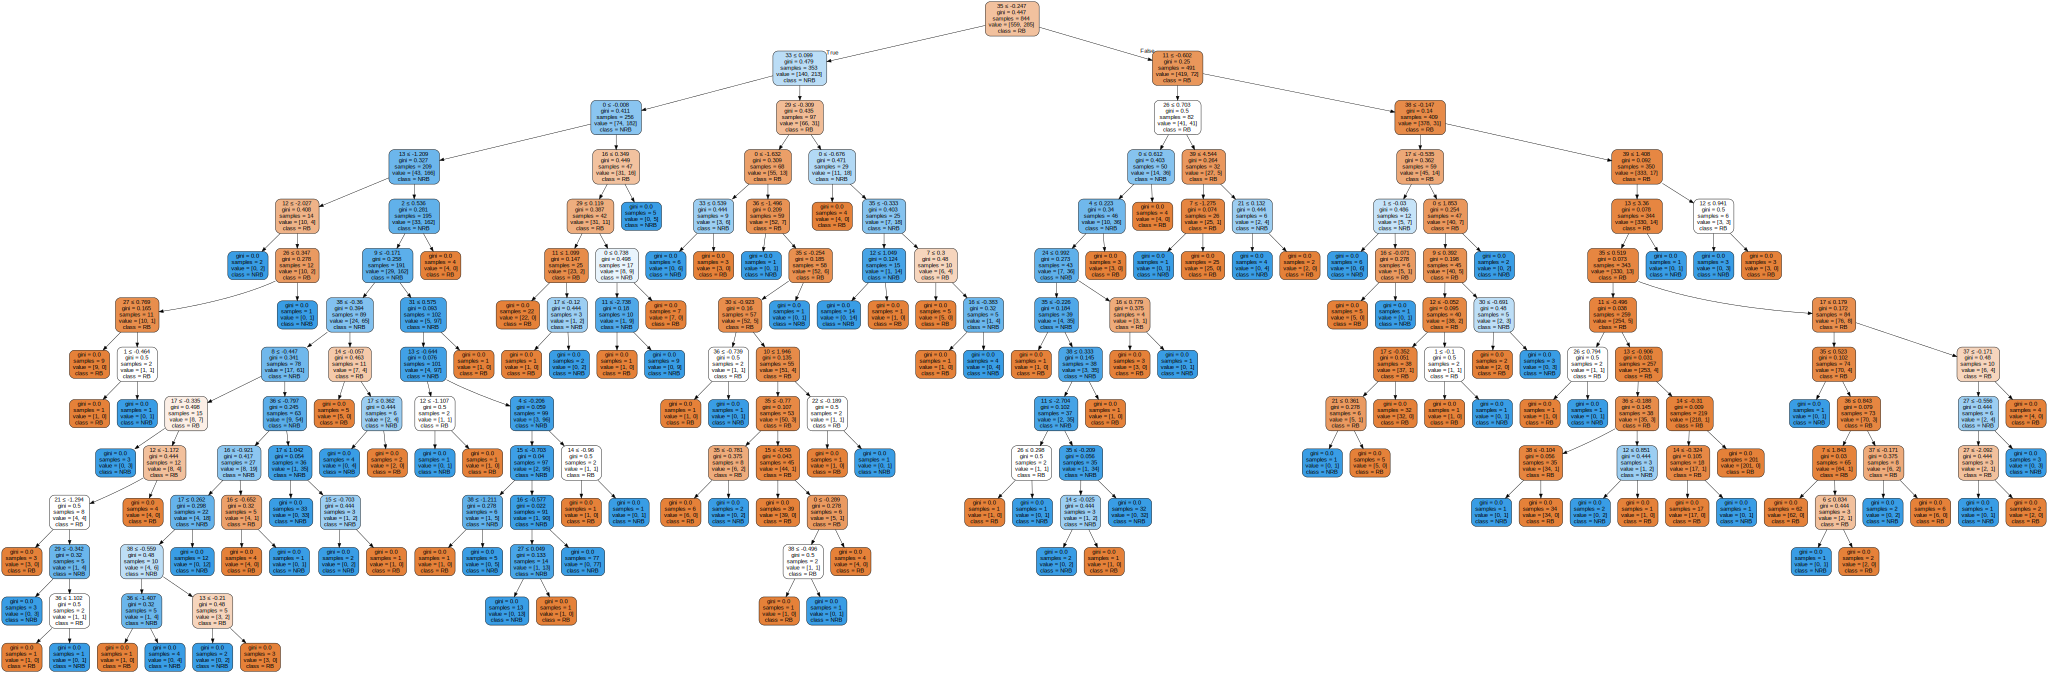

In [38]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, Y_train)
dot_data = export_graphviz(dt, out_file=None, feature_names=df.iloc[:, :-1].columns, class_names=['RB', 'NRB'], filled=True, 
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph.render("tree") # export as pdf
graph

## 2. Models <a class="anchor" id="models"></a>

In [39]:
names = ["Logistic Regression", 
         "Support Vector Classification", 
         "Naive Bayes", 
         "K-Nearest Neighbors", 
         "Decision Tree", 
         "Random Forest"]
classifiers = [LogisticRegression(), 
               SVC(), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1), 
               RandomForestClassifier(random_state=1)]

## 3. Evaluation <a class="anchor" id="evaluation"></a>

In [40]:
def evaluate(model):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

## 4. Parameters Tuning <a class="anchor" id="tuning"></a>

In [41]:
def test_hyperparameters(algo, hyperparameters):
    grid = GridSearchCV(algo, hyperparameters, scoring='accuracy', n_jobs=-1,
                       error_score=0)
    grid.fit(X_train, np.ravel(Y_train))
    print("The best paramaters are %s with a score of %f"
          %(grid.best_params_, grid.best_score_))
    return grid.best_estimator_

### Logistic Regression

In [42]:
hp = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
     'C':np.logspace(-3, 2, 100),
     'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
best_lr = test_hyperparameters(LogisticRegression(), hp)

The best paramaters are {'C': 1.2045035402587825, 'penalty': 'l2', 'solver': 'liblinear'} with a score of 0.855523


### SVC

In [43]:
hp = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
     'C':np.logspace(-3, 2, 100)}
best_svc = test_hyperparameters(SVC(), hp)

The best paramaters are {'C': 0.23644894126454072, 'kernel': 'linear'} with a score of 0.867343


### Naive Bayes

In [44]:
hp = {'var_smoothing':np.logspace(-9, 0, 100)}
best_nb = test_hyperparameters(GaussianNB(), hp)

The best paramaters are {'var_smoothing': 0.005336699231206312} with a score of 0.735785


### KNN

In [45]:
hp = {'n_neighbors':range(1, 100, 2),
     'metric':['euclidean', 'manhattan', 'minkowski'],
     'weights':["uniform", 'distance']}
best_knn = test_hyperparameters(KNeighborsClassifier(), hp)

The best paramaters are {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'} with a score of 0.854304


### Decision Tree

In [46]:
hp = {'criterion':['gini', 'entropy'],
     'max_depth':range(1, 101),
     'max_features':['auto', 'log2', 'sqrt', 'None'],
     'min_samples_split':[2, 4, 6]}
best_dt = test_hyperparameters(DecisionTreeClassifier(random_state=1), hp)

The best paramaters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_split': 6} with a score of 0.819942


### Random Forest

In [47]:
hp = {'max_features':['sqrt', 'log', 'auto'],
     'n_estimators':np.logspace(1, 3, dtype=int)}
best_rf = test_hyperparameters(RandomForestClassifier(random_state=1), hp)

The best paramaters are {'max_features': 'sqrt', 'n_estimators': 184} with a score of 0.859045


## 5. Comparison <a class="anchor" id="comparison"></a>

### Before Tuning <a class="anchor" id="before"></a>

In [48]:
default_scores = [evaluate(clf) for clf in classifiers]
default = pd.DataFrame(list(zip(names, default_scores)), columns=['Name', 'Score'])
default

,Name,Score
0,Logistic Regression,0.890995
1,Support Vector Classification,0.900474
2,Naive Bayes,0.715640
3,K-Nearest Neighbors,0.857820
4,Decision Tree,0.805687
5,Random Forest,0.895735


In [49]:
fig = px.bar(default, x='Name', y='Score', color='Score', title='Models accuracy before tuning')
fig.update_layout(xaxis_title='Model', yaxis_title='Score', yaxis_range=[0.6, 0.95])
fig.show()

### After Tuning <a class="anchor" id="after"></a>

In [50]:
best_models = [best_lr,
              best_svc,
              best_nb,
              best_knn,
              best_dt,
              best_rf]

In [51]:
tuned_scores = [evaluate(clf) for clf in best_models]
tuned = pd.DataFrame(list(zip(names, tuned_scores)), columns=['Name', 'Score'])
tuned

,Name,Score
0,Logistic Regression,0.890995
1,Support Vector Classification,0.900474
2,Naive Bayes,0.734597
3,K-Nearest Neighbors,0.886256
4,Decision Tree,0.815166
5,Random Forest,0.900474


In [52]:
fig = go.Figure(data=[
    go.Bar(name='Before', x=default.Name, y=default.Score,),
    go.Bar(name='After', x=tuned.Name, y=tuned.Score)
])
fig.update_layout(xaxis_title='Model', yaxis_title='Score', legend_title='Tuning', yaxis_range=[0.6, 0.95])
fig.show()

## Conclusion <a class="anchor" id="conclusion"></a>

### Confusion Matrix <a class="anchor" id="conf-mat"></a>

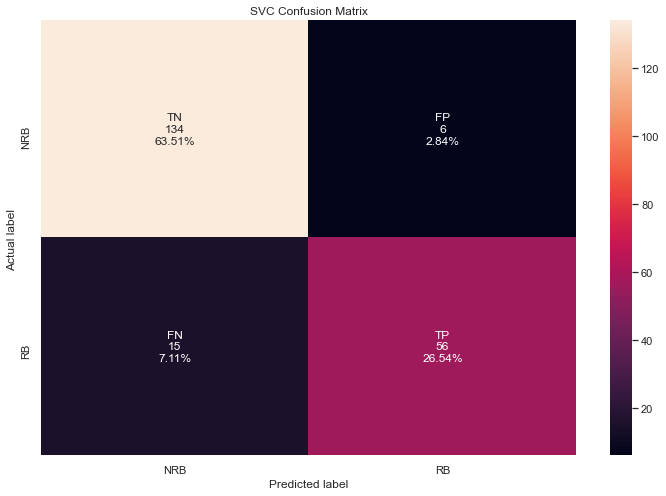

In [53]:
cm = confusion_matrix(Y_test, best_svc.predict(X_test))
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percent = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names, group_counts, group_percent)]
labels = np.asarray(labels).reshape(2,2)

sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.heatmap(cm, annot=labels, fmt='')
ax.set_title('SVC Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label ');

ax.xaxis.set_ticklabels(['NRB','RB'])
ax.yaxis.set_ticklabels(['NRB','RB'])

plt.show()

In [54]:
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred)
prec = precision_score(Y_test, pred, pos_label='RB')
rec = recall_score(Y_test, pred, pos_label='RB')
'Recall: {0:.2%}, Precision: {1:.2%}, Accuracy: {2:.2%}'.format(rec, prec, acc)

NameError: name 'knn' is not defined

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
df_cm = pd.DataFrame([[TP, FP], [FN, TN]], columns=['RB', 'NRB'], index=['RB', 'NRB'])
df_cm

In [ ]:
fig = ff.create_annotated_heatmap(df_cm.to_numpy(),x=['RB', 'NRB'], y=['RB', 'NRB'])
fig.update_layout(yaxis_autorange='reversed', xaxis_showgrid=False, yaxis_showgrid=False, xaxis_ticks='outside', yaxis_ticks='outside')

fig.add_annotation(font=dict(color='black', size=20),x=0.3, y=1.2, showarrow=False, text="Actual Label", xref='paper', yref='paper')
fig.add_annotation(font=dict(color='black', size=20),x=-0.1, y=0.7, showarrow=False, text="Predicted Label", textangle=-90, xref='paper', yref='paper')

fig.add_annotation(x=1.5, y=0, text='Precision: {0:.2%}'.format(prec), showarrow=True, font=dict(size=16), xanchor='left',
                   ax=40, ay=0, arrowhead=2, arrowsize=1, arrowwidth=3, arrowcolor='black', borderwidth=2, opacity=0.8)
fig.add_annotation(x=0, y=1.5, text='Recall: {0:.2%}'.format(rec), showarrow=True, font=dict(size=16), yanchor='top',
                   ax=0, ay=40, arrowhead=2, arrowsize=1, arrowwidth=3, arrowcolor='black', borderwidth=2, opacity=0.8)
fig.add_annotation(x=1.75, y=1.5, text='Accuracy: {0:.2%}'.format(acc), showarrow=False, font=dict(size=16), yanchor='top',
                   ax=0, ay=40, arrowhead=2, arrowsize=1, arrowwidth=3, arrowcolor='black', borderwidth=2, opacity=0.8)

fig.show()

In [ ]:
fig = ff.create_annotated_heatmap(z=cm, x=['NRB', 'RB'], y=['NRB', 'RB'])
fig.update_layout(title={'text': 'Confusion matrix', 'x':0.5, 'y':0.9}, yaxis_autorange='reversed')
for i in range(len(labels.flatten())):
    fig.layout.annotations[i].text = labels.flatten()[i]

fig.add_annotation(x=0.5, y=-0.15, showarrow=False, text='Predicted value', xref='paper', yref='paper')
fig.add_annotation(x=-0.15, y=0.5, showarrow=False, text='Real value', textangle=-90, xref='paper', yref='paper')

fig.show()